## Log Regression


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns

In [80]:
df = pd.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [81]:
#y --> customer types
# balance and inbalance dataset
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [83]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [84]:
df[df['Arrival Delay in Minutes'].isnull()]

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
213,Female,Loyal Customer,Business travel,Eco,satisfied,38,109,5,4,5,31,NaN
1124,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,53,1012,4,4,4,38,NaN
1529,Male,Loyal Customer,Business travel,Business,neutral or dissatisfied,39,733,2,2,3,11,NaN
2004,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied,26,1035,2,4,2,41,NaN
2108,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,24,417,5,2,5,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,49,1249,3,4,3,230,NaN
102384,Male,Loyal Customer,Business travel,Eco,neutral or dissatisfied,58,733,3,2,3,55,NaN
102552,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,29,1107,5,5,5,0,NaN
102960,Male,Loyal Customer,Business travel,Eco,satisfied,58,1088,5,5,5,0,NaN


In [85]:
df.dropna(inplace=True)

In [86]:
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [87]:
df.duplicated().sum()

172

In [88]:
df.drop_duplicates(inplace=True)

In [89]:
## balance data operations 
# 

In [90]:
loyal_cust=df[df['Customer Type']=='Loyal Customer']
disloyal_cust =df[df['Customer Type']=='disloyal Customer']

In [91]:
loyal_customer=loyal_cust.sample(21000)

In [92]:
balace_df=pd.concat([loyal_customer,disloyal_cust],axis=0)
balace_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
30151,Male,Loyal Customer,Business travel,Business,satisfied,46,2105,3,3,4,0,6.0
99825,Male,Loyal Customer,Business travel,Business,satisfied,40,631,4,4,4,0,0.0
50504,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,70,1416,1,1,1,0,0.0
39071,Female,Loyal Customer,Business travel,Business,satisfied,29,1917,5,4,5,51,45.0
102382,Male,Loyal Customer,Business travel,Business,satisfied,47,759,4,4,3,24,19.0


In [93]:
cat_col=balace_df.select_dtypes(include='O')
cat_col
                                

,Gender,Customer Type,Type of Travel,Class,satisfaction
30151,Male,Loyal Customer,Business travel,Business,satisfied
99825,Male,Loyal Customer,Business travel,Business,satisfied
50504,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
39071,Female,Loyal Customer,Business travel,Business,satisfied
102382,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103892,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied


In [94]:
num_col = balace_df.select_dtypes(exclude='O')
num_col

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
30151,46,2105,3,3,4,0,6.0
99825,40,631,4,4,4,0,0.0
50504,70,1416,1,1,1,0,0.0
39071,29,1917,5,4,5,51,45.0
102382,47,759,4,4,3,24,19.0
...,...,...,...,...,...,...,...
103892,37,596,3,3,3,110,121.0
103895,24,1055,1,5,1,13,10.0
103899,23,192,2,4,2,3,0.0
103901,30,1995,4,4,4,7,14.0


In [95]:
cat_col 

,Gender,Customer Type,Type of Travel,Class,satisfaction
30151,Male,Loyal Customer,Business travel,Business,satisfied
99825,Male,Loyal Customer,Business travel,Business,satisfied
50504,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
39071,Female,Loyal Customer,Business travel,Business,satisfied
102382,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103892,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied


In [96]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [97]:
encoder= OneHotEncoder(drop='if_binary')

In [98]:
encoder = OneHotEncoder()

In [99]:
print(OneHotEncoder.__doc__)


    Encode categorical features as a one-hot numeric array.

    The input to this transformer should be an array-like of integers or
    strings, denoting the values taken on by categorical (discrete) features.
    The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
    encoding scheme. This creates a binary column for each category and
    returns a sparse matrix or dense array (depending on the ``sparse_output``
    parameter).

    By default, the encoder derives the categories based on the unique values
    in each feature. Alternatively, you can also specify the `categories`
    manually.

    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.

    Note: a one-hot encoding of y labels should use a LabelBinarizer
    instead.

    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    For a comparison of different encoders, refer to:
    :ref:`sp

In [100]:
onehot_data=encoder.fit_transform(cat_col).toarray()

In [101]:
onehot_data.shape

(39905, 11)

In [102]:
column_names=list(encoder.get_feature_names_out())
column_names

['Gender_Female',
 'Gender_Male',
 'Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer',
 'Type of Travel_Business travel',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_neutral or dissatisfied',
 'satisfaction_satisfied']

In [118]:
one_hot=pd.DataFrame(onehot_data,columns=column_names)
one_hot

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
39900,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
39901,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
39902,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
39903,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [119]:
num_col

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,46,2105,3,3,4,0,6.0
1,40,631,4,4,4,0,0.0
2,70,1416,1,1,1,0,0.0
3,29,1917,5,4,5,51,45.0
4,47,759,4,4,3,24,19.0
...,...,...,...,...,...,...,...
39900,37,596,3,3,3,110,121.0
39901,24,1055,1,5,1,13,10.0
39902,23,192,2,4,2,3,0.0
39903,30,1995,4,4,4,7,14.0


In [120]:
final_df= pd.concat([one_hot,num_col],axis=1)
final_df

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,46,2105,3,3,4,0,6.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40,631,4,4,4,0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,70,1416,1,1,1,0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,29,1917,5,4,5,51,45.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,47,759,4,4,3,24,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39900,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,37,596,3,3,3,110,121.0
39901,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,24,1055,1,5,1,13,10.0
39902,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,23,192,2,4,2,3,0.0
39903,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,30,1995,4,4,4,7,14.0


In [106]:
num_col.reset_index(drop=True,inplace=True)


In [121]:
final_df

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,46,2105,3,3,4,0,6.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40,631,4,4,4,0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,70,1416,1,1,1,0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,29,1917,5,4,5,51,45.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,47,759,4,4,3,24,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39900,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,37,596,3,3,3,110,121.0
39901,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,24,1055,1,5,1,13,10.0
39902,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,23,192,2,4,2,3,0.0
39903,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,30,1995,4,4,4,7,14.0


In [122]:
final_df.to_csv('cust_airline_cleaned.csv',index=False)

In [123]:
x = final_df.drop('Customer Type_disloyal Customer',axis=1)
y = final_df[['Customer Type_disloyal Customer']]

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [126]:
x_train

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
15136,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,49,189,2,2,4,5,3.0
2017,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,70,3490,4,4,4,23,25.0
24559,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,26,533,4,4,4,55,56.0
19021,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,70,1236,3,4,3,87,84.0
37652,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,38,951,1,5,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16962,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,26,2251,3,3,3,11,9.0
3740,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10,894,2,3,2,0,13.0
20783,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,43,569,3,4,3,0,1.0
20150,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,44,762,1,4,1,0,0.0


In [127]:
y_train

,Customer Type_disloyal Customer
15136,0.0
2017,0.0
24559,1.0
19021,0.0
37652,1.0
...,...
16962,0.0
3740,0.0
20783,0.0
20150,0.0


In [128]:
from sklearn.linear_model import LogisticRegression


In [129]:
lr = LogisticRegression()

In [130]:
lr.fit(x_train,y_train)

c:\Users\Jai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
lr.score(x_train,y_train)

0.9556446560581381

In [132]:
lr.score(x_test,y_test)

0.9517604310236812

### for emoji in code press windows key + semicolumn


In [ ]:
# to increase accuuracy
#data cleaning
# amount of data should be more


In [1]:
# import sklearn.metrics import

In [133]:
df = pd.read_csv('cust_airline_cleaned.csv')
df

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,46,2105,3,3,4,0,6.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40,631,4,4,4,0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,70,1416,1,1,1,0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,29,1917,5,4,5,51,45.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,47,759,4,4,3,24,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39900,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,37,596,3,3,3,110,121.0
39901,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,24,1055,1,5,1,13,10.0
39902,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,23,192,2,4,2,3,0.0
39903,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,30,1995,4,4,4,7,14.0


In [134]:
pred = lr.predict(x_test)

In [137]:
y_test['predictin'] = pred

In [138]:
y_test

,Customer Type_disloyal Customer,predictin
25437,1.0,1.0
37325,1.0,1.0
870,0.0,0.0
2940,0.0,0.0
35639,1.0,1.0
...,...,...
29346,1.0,1.0
7889,0.0,0.0
35776,1.0,1.0
37247,1.0,1.0


### MODEL EVALUATION 

In [140]:
y_test['Customer Type_disloyal Customer'].value_counts()

Customer Type_disloyal Customer
0.0    4207
1.0    3774
Name: count, dtype: int64

In [142]:
y_test['predictin'].value_counts()


predictin
0.0    4192
1.0    3789
Name: count, dtype: int64

In [143]:
from sklearn.metrics import confusion_matrix,classification_report

In [144]:
metrix = confusion_matrix(y_test['Customer Type_disloyal Customer'],y_test['predictin'])
metrix

array([[4007,  200],
       [ 185, 3589]], dtype=int64)

In [146]:
import seaborn as sns 

<Axes: >

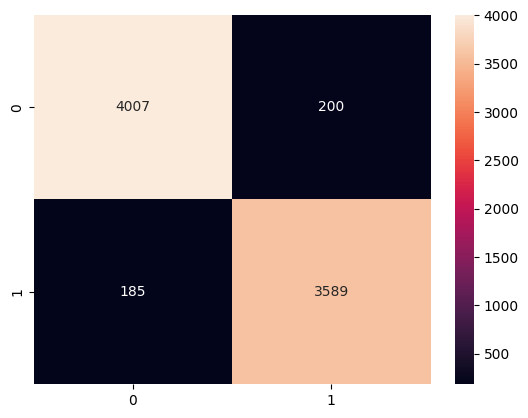

In [152]:
sns.heatmap(metrix,annot=True,fmt='d')

In [157]:
acc = (4007+3589)/(4007+200+185+3589)
acc

0.9517604310236812

In [ ]:
activatin(y) == 0 - 1

In [155]:
predictin_2 = lr.predict_proba(x_test)
predictin_2

array([[2.42899391e-03, 9.97571006e-01],
       [2.68033328e-04, 9.99731967e-01],
       [9.99475245e-01, 5.24754984e-04],
       ...,
       [5.39917952e-03, 9.94600820e-01],
       [1.57737897e-04, 9.99842262e-01],
       [9.99988928e-01, 1.10721307e-05]])

In [159]:
print(classification_report(y_test['Customer Type_disloyal Customer'],y_test['predictin']))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      4207
         1.0       0.95      0.95      0.95      3774

    accuracy                           0.95      7981
   macro avg       0.95      0.95      0.95      7981
weighted avg       0.95      0.95      0.95      7981

